主題：卡片配對記憶遊戲
===
介紹：
畫面上會有20張卡片，卡片內容(可以是符號或是圖片...等等)，使用者依序選擇兩張卡片開啟，若卡片內容相同即完成配對，若卡片內容不同，於一秒之後將會覆蓋起來，直到所有的卡片配對完成。

實作說明與建議：
* 透過numpy array儲存卡片資訊(正面、反面、是否開啟...)
* 可以透過numpy.random.shuffle打亂array的順序，讓卡片內容能隨機分布。
* 透過條件判斷，來改變卡片正反面的狀態及顯示。
* 透過interact_manual讓使用者選擇卡片。
* 透過print中的format來控制顯示
* 透過clear_output來刷新顯示，已呈現最新的卡片狀況

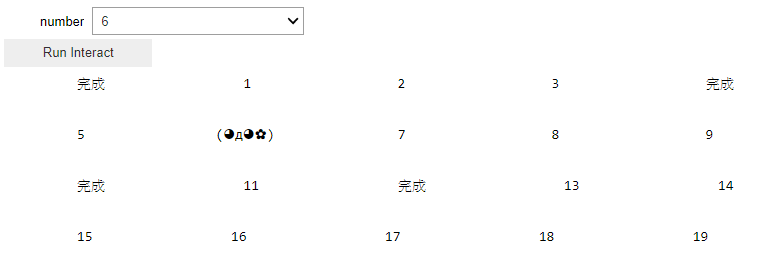

In [1]:
%matplotlib inline
import numpy as np
import time
from ipywidgets import interact_manual
from IPython.display import clear_output

# 所有的內容
content_list = ["(º﹃º )" ,"ఠ_ఠ" ,"(◕д◕✿)" ,"v(￣ｰ￣)v" ,"(`・ω・´)" ,"(￣∇￣)" ,"(´ﾟдﾟ`)" ,"(≧▽≦)" ,"｡^‿^｡" ,"(◕ᴥ◕)" ]

# 內容總數
counts = len(content_list)

# 比較兩張卡片是否相同的空間
temp_list = []

# 正面：編號
front = np.arange(counts*2)

# 背面：內容
back = np.array([content_list[i//2] for i in front])

# 開啟狀態
status = np.zeros(counts*2, dtype=bool)

# 打亂內容
np.random.shuffle(back)

# 將所有資訊放到cards中
cards = np.array(list(zip(front, back, status)))

def f(number):
    # 該此選中的卡片編號
    index = int(number)
    global cards
    global temp_list
    
    # 卡片未開啟
    if cards[index][2]=='False':
        # 比較清單中無卡片
        if len(temp_list) == 0:
            # 加入此目標到清單中，並更新狀態。
            card = cards[index]
            temp_list.append(list(card))
            cards[index][2] = True
            cards[index][0] = back[index]
            
        # 比較清單已有一張卡片    
        elif len(temp_list) == 1:
            # 加入此目標到清單中，並更新狀態。
            card = cards[index]
            temp_list.append(list(card))
            cards[index][2] = True
            cards[index][0] = back[index]
            card1_index = int(temp_list[0][0])
            card2_index = int(temp_list[1][0])
            
            # 狀態更新後，重繪矩陣。
            counts = 0
            for c in cards:
                print('{:^20}'.format(c[0]), end='')
                if (counts+1)%5==0:
                    print("\n\n")
                counts+=1 
                
            # 判斷兩張卡片是否相同
            if temp_list[0][1] == temp_list[1][1]:
                # 卡片相同，顯示完成
                cards[card1_index][0] = '完成'
                cards[card2_index][0] = '完成'
                
                # 清除比較清單中的卡片
                temp_list = []
                
            else:
                # 卡片不相同，將狀態顯示為關閉。
                cards[card1_index][0] = temp_list[0][0]
                cards[card2_index][0] = temp_list[1][0]            
                cards[card1_index][2] = False
                cards[card2_index][2] = False
                
                # 清除比較清單中的卡片
                temp_list = []
            
            # 等待1秒給予使用者記憶
            time.sleep(1)
            # 清除上一次的繪製內容
            clear_output(wait=True)                  
    # 卡片已開啟
    else:
        print(f'{index} 號卡片已經開啟！')             

    
    # 重繪內容
    counts = 0
    for c in cards:
        print('{:^20}'.format(c[0]), end='')
        if (counts+1)%5==0:
            print("\n\n")
        counts+=1 
    
        
interact_manual(f, number=front)

interactive(children=(Dropdown(description='number', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…

<function __main__.f(number)>